In [ ]:
## NON-NEGATIVE MATRIX FACTORIZATION (NMF)
# applications in general: Recommender systems & Topic modeling
# application now: Topic modeling

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
import random

In [16]:
# Import file and load in dataframe
#------------------------------------------------------------
file ='bbc_text_cls.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(file, encoding="ISO-8859-1")

In [17]:
# Define stopwords scope
stop_words = list(set(stopwords.words('english')))
stop_words = stop_words + ['said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year'] # based on observations 

In [33]:
# Split Train Vs Test
test_size = 0.2
X_train, X_test = train_test_split(df['text'], test_size=test_size, random_state=34)
print("Number of Train docs = ",df.shape[0]*(1-test_size))
# Count Vectorize Train docs
vectorizer = CountVectorizer(decode_error='ignore', stop_words=stop_words)
X = vectorizer.fit_transform(X_train)
# LDA for train-vectors
n_components=10
max_iter=500
beta_loss = 'kullback-leibler'
solver = 'mu'
nmf=NMF(n_components=n_components,  max_iter=max_iter, beta_loss=beta_loss, solver=solver, random_state=34)
nmf.fit(X) # if it was supervised learning we would do fit(X,Y)
Z = nmf.transform(X) # returns {docs x topics} matrix
topics = nmf.components_
print("lda.components_: topics x words = ",topics.shape)
print("lda.transform: docs x topics = ",Z.shape)

Number of Train docs =  1780.0
lda.components_: topics x words =  (10, 26878)
lda.transform: docs x topics =  (1780, 10)


In [41]:
def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    color = random_color()
    ax.barh(top_features, weights, height=0.7, color=color)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.savefig(fname="nmf_components.png",bbox_inches='tight', format='png')
  plt.show()

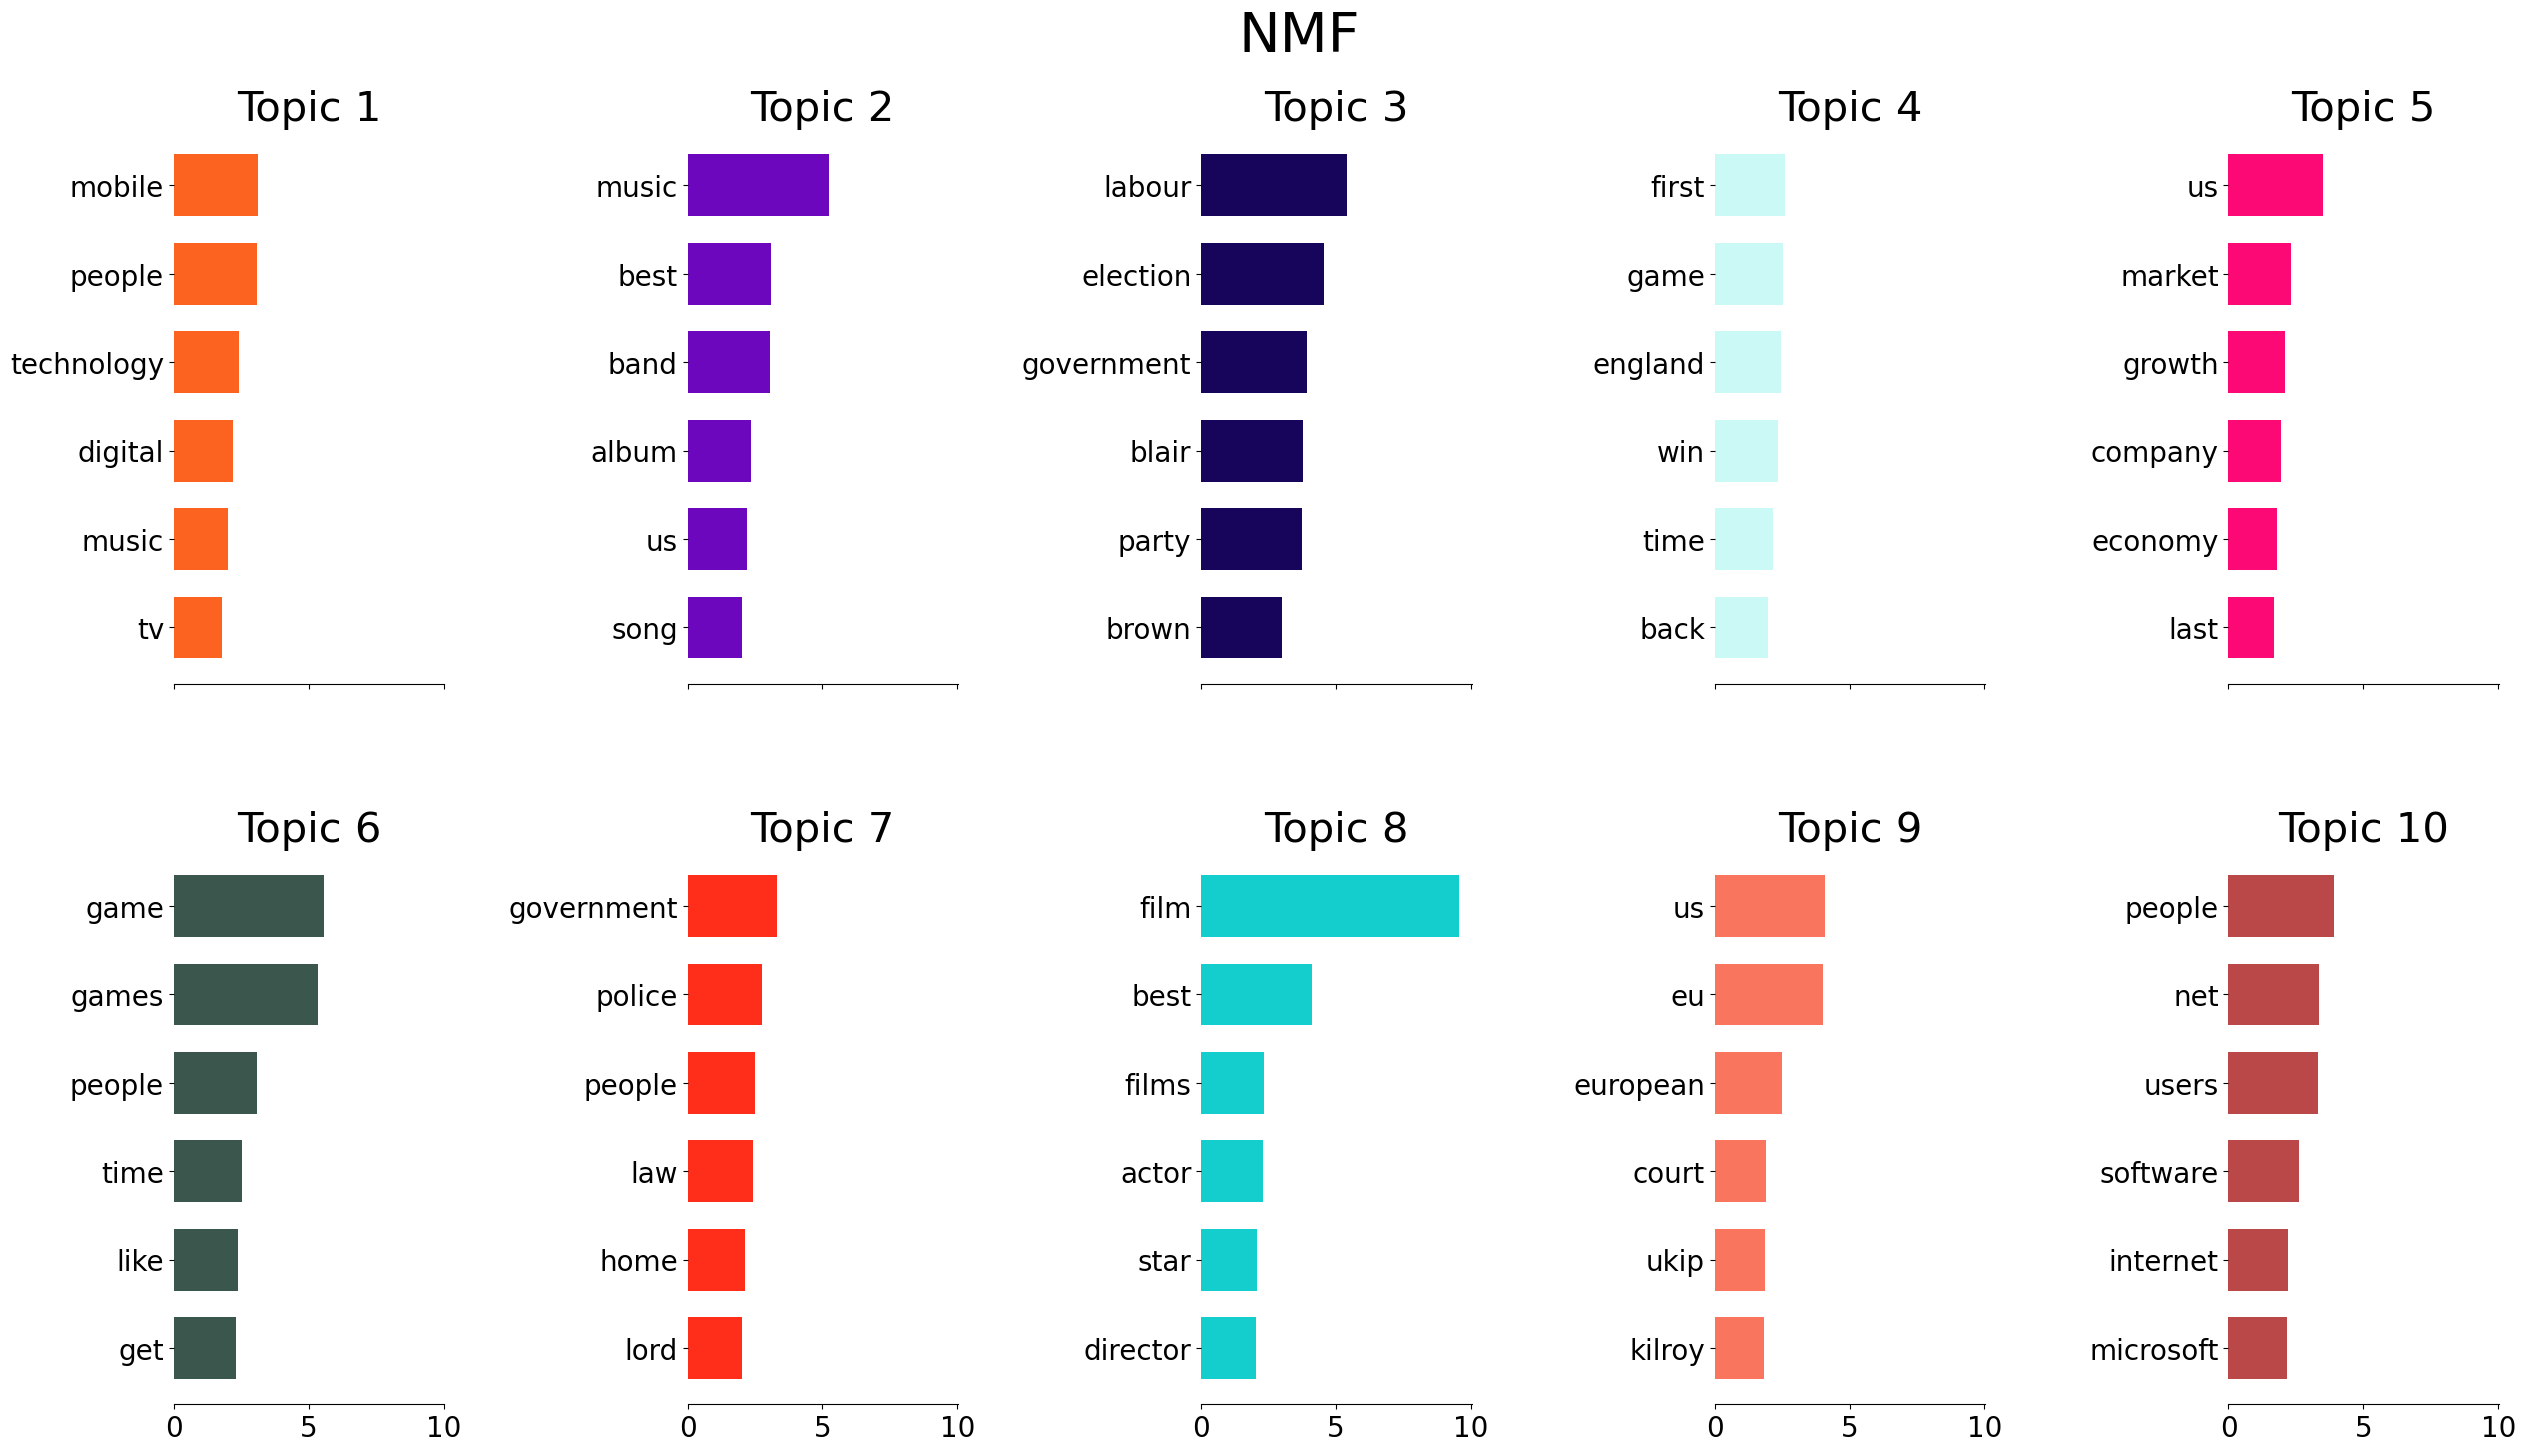

In [42]:
# Get the feature names (words) from the CountVectorizer
feature_names = np.array(vectorizer.get_feature_names_out()) # mapped words to topics array indices
# Get the top N words for each topic
top_n_words = 6  # You can change this number as needed
# Plot top words per topic 
plot_top_words(nmf, feature_names, top_n_words);

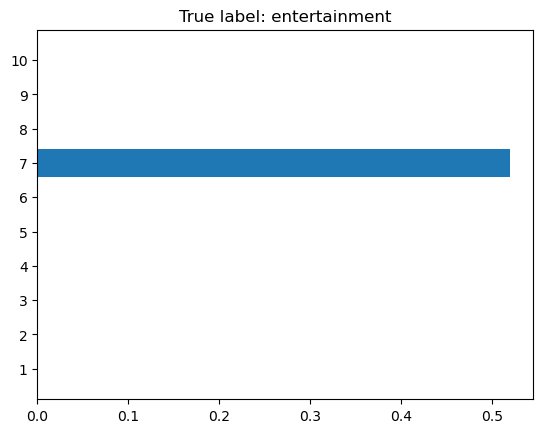

In [46]:
# Pick a random document
# Check which "topics" are associated with it
# Are they related to the true label?

i = np.random.choice(len(X_train))
z = Z[i]
topics_associated = np.arange(n_components) + 1
fig, ax = plt.subplots()
ax.barh(topics_associated, z)
ax.set_yticks(topics_associated)
ax.set_title('True label: %s' % df.iloc[i]['labels']);
fig.savefig(fname="nmf_doc_prob.png", bbox_inches='tight', format='png')

In [39]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Gervais writing Simpsons episode

The Office's Ricky Gervais is
writing an episode of hit US cartoon The Simpsons, following an
invitation from its creator Matt Groening.

Gervais has already begun
writing the script but is keeping its subject matter a closely guarded
secret.  He will also write a part for himself in the episode.  "I've
got the rough idea but this is the most intimidating project of my
career.  The Simpsons is the greatest TV show of all time," he said.
Groening recently heaped praise on The Office, saying: "Everybody on
The Simpsons is a fan of The Office - it's one of the best shows on TV
in the last decade."  Gervais has already said he would not guest star
in the show as his Office character David, having left him behind for
good in the Christmas specials.  The Office became a surprise US
success when it was screened on cable channel BBC America.  The first
series won two Golden Globes in 2004 for best comedy and best TV actor
for Gervais.

In winning it beat the l